<a href="https://colab.research.google.com/github/dotsoon/workspace/blob/master/3_%EA%B2%80%EC%83%89%EB%9F%89(%EB%9D%BC%EC%9D%B8%2C_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
search_all = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/pj/저장/search_all.csv', encoding='euc-kr')
search1 = search_all[['CL_NM', 'AREA_NM', 'ADDR', 'JAN_VIEWS_CO', 'FEB_VIEWS_CO',	'MAR_VIEWS_CO',	'APR_VIEWS_CO',	'MAY_VIEWS_CO',	'JUN_VIEWS_CO',	'JULY_VIEWS_CO',	'AUG_VIEWS_CO',	'SEP_VIEWS_CO',	'OCT_VIEWS_CO', 'ALL_TOTAL_CO']]
search2 = search1.reset_index(drop=True)
search = search2.rename(columns={'CL_NM':'업종', 'AREA_NM':'이름', 'ADDR':'주소', 'JAN_VIEWS_CO':'1월', 'FEB_VIEWS_CO':'2월',	'MAR_VIEWS_CO':'3월',	'APR_VIEWS_CO':'4월',	'MAY_VIEWS_CO':'5월',	'JUN_VIEWS_CO':'6월',	'JULY_VIEWS_CO':'7월',	'AUG_VIEWS_CO':'8월',	'SEP_VIEWS_CO':'9월',	'OCT_VIEWS_CO':'10월', 'ALL_TOTAL_CO':'전체'})

In [ ]:
hotel = search[search['업종'].isin(['숙박'])]
food = search[search['업종'].isin(['음식점'])]
tour = search[search['업종'].isin(['관광지'])]
shop = search[search['업종'].isin(['쇼핑'])]
food_top = food.nlargest(10,'전체', keep='all')
hotel_top = hotel.nlargest(10,'전체', keep='all')
tour_top = tour.nlargest(10,'전체', keep='all')
shop_top = shop.nlargest(10,'전체', keep='all')

In [ ]:
import plotly.express as px

In [ ]:
ft = food_top.loc[:,['이름','1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월','10월']]
food_t = ft.set_index(keys='이름')
ht = hotel_top.loc[:,['이름','1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월','10월']]
hotel_t = ht.set_index(keys='이름')
tt = tour_top.loc[:,['이름','1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월','10월']]
tour_t = tt.set_index(keys='이름')
st = shop_top.loc[:,['이름','1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월','10월']]
shop_t = st.set_index(keys='이름')

## 음식점 검색량 상위 10
몽상드애월,, 올래국수, 리치망고 등 여름에 먹기좋은 음료와 국수메뉴는 여름에 급 상승 했다가 하락.. 
전체 메뉴 휴가철 지나고 하락했다가 10월부터 다시 상승
너무 더운 8월은 오히려 낮음.. 

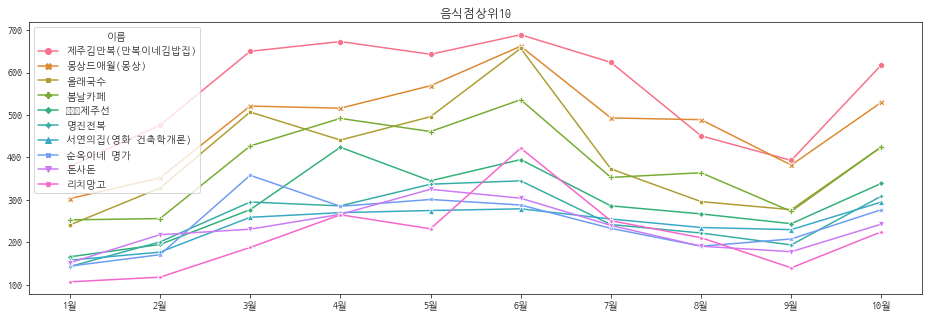

In [ ]:
fig = plt.figure( figsize = (16, 5) )
sns.lineplot( data=food_t.T, markers=True, dashes=False, palette='husl')
plt.title('음식점상위10')
plt.show()

## 관광지 검색량 상위 10
성산일출봉.. 올라가야해서 더운 여름에 급 하락 
여름에도 시원한 동굴 만장굴은 여름부터 상승 
나무가 많은 !! 비자림, 사려니 숲길은 꾸준히 높다.. 

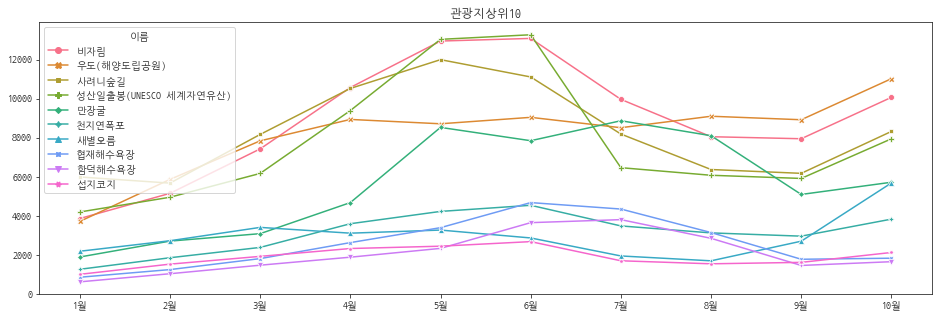

In [ ]:
fig = plt.figure( figsize = (16, 5) )
sns.lineplot( data=tour_t.T, markers=True, dashes=False, palette='husl')
plt.title('관광지상위10')
plt.show()

## 숙박 검색량 상위 10

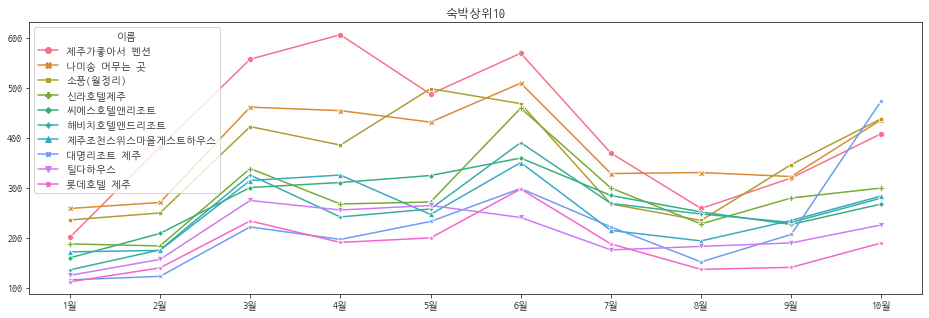

In [ ]:
fig = plt.figure( figsize = (16, 5) )
sns.lineplot( data=hotel_t.T, markers=True, dashes=False, palette='husl')
plt.title('숙박상위10')
plt.show()

## 쇼핑 검색량 상위 10

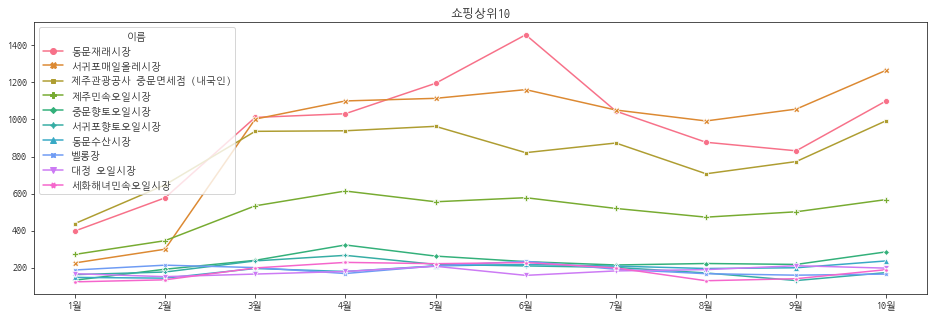

In [ ]:
fig = plt.figure( figsize = (16, 5) )
sns.lineplot( data=shop_t.T, markers=True, dashes=False, palette='husl')
plt.title('쇼핑상위10')
plt.show()

In [ ]:
# 델문도 짤라서 매출 추가 

In [ ]:
dmd = food[food['이름']=='델문도']
dmdn = dmd.loc[:,['이름','1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월','10월']]
dmds = dmdn.set_index(keys='이름')
dmds.index.values[0] = '검색량'

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/pj/저장/sales_row.csv', encoding='euc-kr')
dmdsales = sales[sales['상점명']=='델문도']
changedmd = dmdsales.transpose()
dmdcut = changedmd.loc[['상점명','날짜','제주도민매출수','외지인매출수'], :]
dmd1 = dmdcut.rename(columns=dmdcut.iloc[1])
dmd2 = dmd1.drop(index=['상점명','날짜'], axis=0)
dmd3 = dmd2.drop(columns=202111, axis=1)
dmd4 = dmd3.rename(columns={202101:'1월',202102:'2월',202103:'3월',202104:'4월',202105:'5월',202106:'6월',202107:'7월',202108:'8월',202109:'9월',202110:'10월'})

In [ ]:
dmdrow=pd.concat([dmds, dmd4])

In [ ]:
dmdrow

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월
검색량,97,126,174,190,222,230,171,183,161,199
제주도민매출수,2.98,2.91,4.25,3.99,4.18,3.3,3.28,3.04,3.69,3.63
외지인매출수,54.4,47.3,52.75,44.44,29.35,24.1,16.31,15.31,23.39,29.65


## 델문도 검색량 매출수 비교 

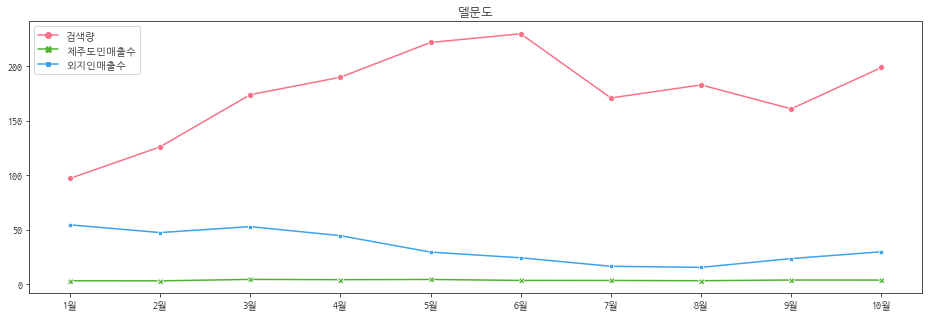

In [ ]:
fig = plt.figure( figsize = (16, 5) )
sns.lineplot( data=dmdrow.T, markers=True, dashes=False, palette='husl')
plt.title('델문도')
plt.show()

In [ ]:
normaldmd = (dmdrow - dmdrow.mean())/dmdrow.std()
normaldmd

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월
검색량,0.967312,1.07903,1.1094,1.12975,1.14824,1.15072,1.15188,1.15255,1.14705,1.14598
제주도민매출수,-1.02976,-0.895564,-0.83205,-0.771615,-0.679736,-0.658351,-0.64577,-0.637292,-0.688455,-0.695628
외지인매출수,0.0624484,-0.183466,-0.27735,-0.35814,-0.468506,-0.492366,-0.506112,-0.515257,-0.458594,-0.450356


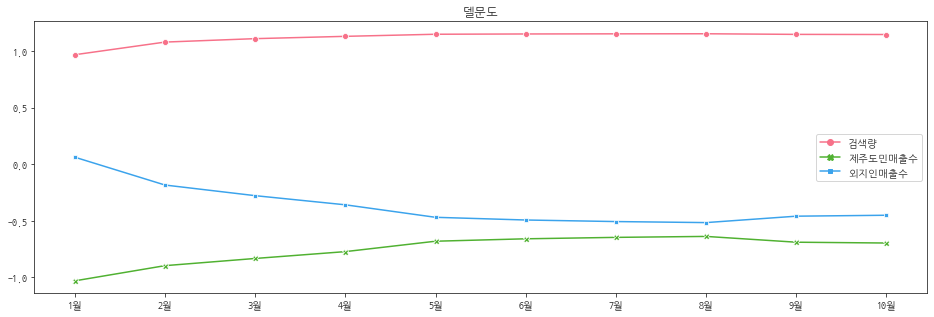

In [ ]:
fig = plt.figure( figsize = (16, 5) )
sns.lineplot( data=normaldmd.T, markers=True, dashes=False, palette='husl')
plt.title('델문도')
plt.show()

In [ ]:
!pip install WordCloud

In [ ]:
from wordcloud import WordCloud

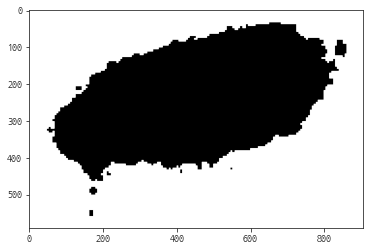

In [ ]:
icon = Image.open('/content/drive/MyDrive/멀티캠퍼스/pj/저장/jeju_mask.png')
plt.imshow(icon)
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

In [ ]:
wc = WordCloud(
    font_path="NanumGothic",
    background_color='skyblue',
    width = 800, height = 800, max_words=100, mask=mask
    )

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(120,70%%, %d%%)" % np.random.randint(10,50)) 

## 관광지 검색량 워드클라우드
우도, 비자림, 사려니숲길 

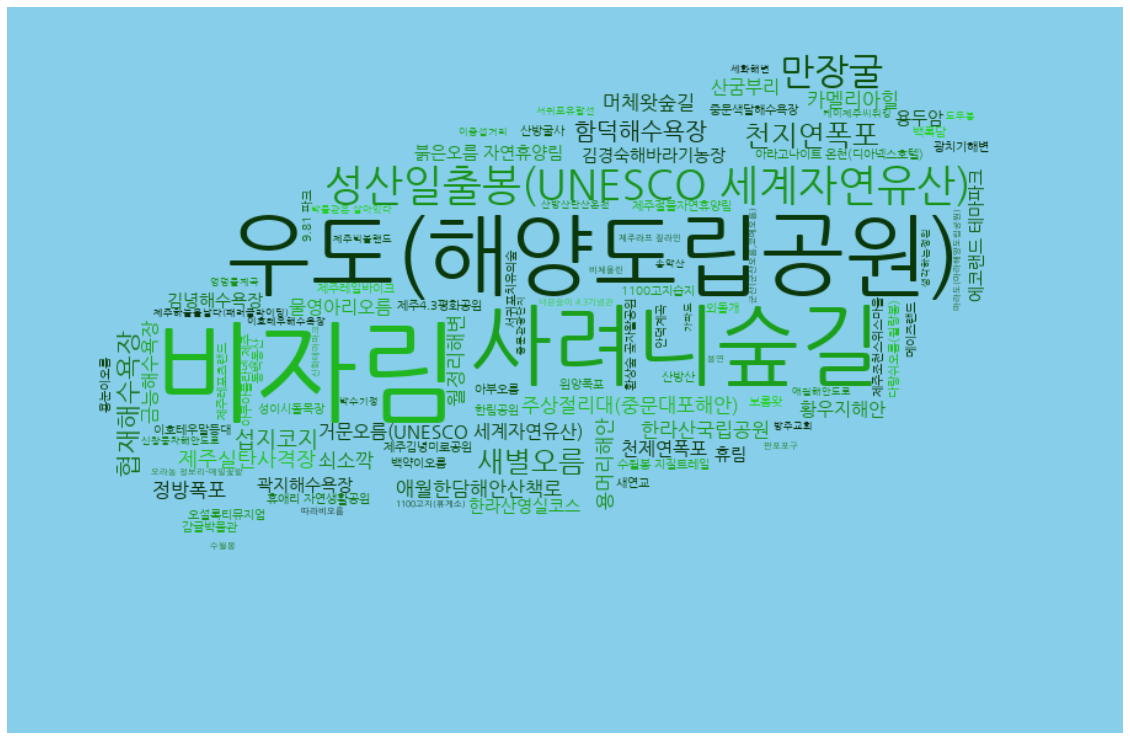

In [ ]:
data = dict(zip(tour['이름'].tolist(), tour['전체'].tolist()))
cloud = wc.generate_from_frequencies(data)
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(cloud.recolor(color_func = grey_color_func),interpolation="bilinear")

## 음식점 검색량 워드클라우드
김만복.. 

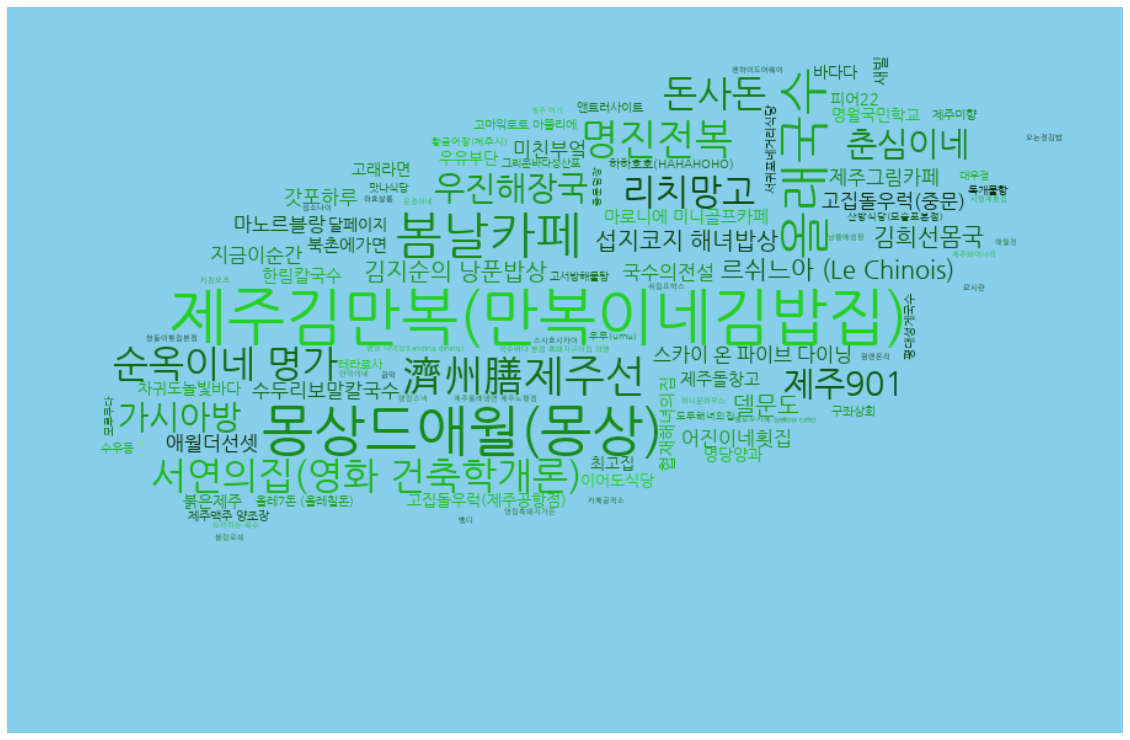

In [ ]:
data = dict(zip(food['이름'].tolist(), food['전체'].tolist()))
cloud = wc.generate_from_frequencies(data)
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(cloud.recolor(color_func = grey_color_func),interpolation="bilinear")

## 쇼핑 검색량 워드클라우드


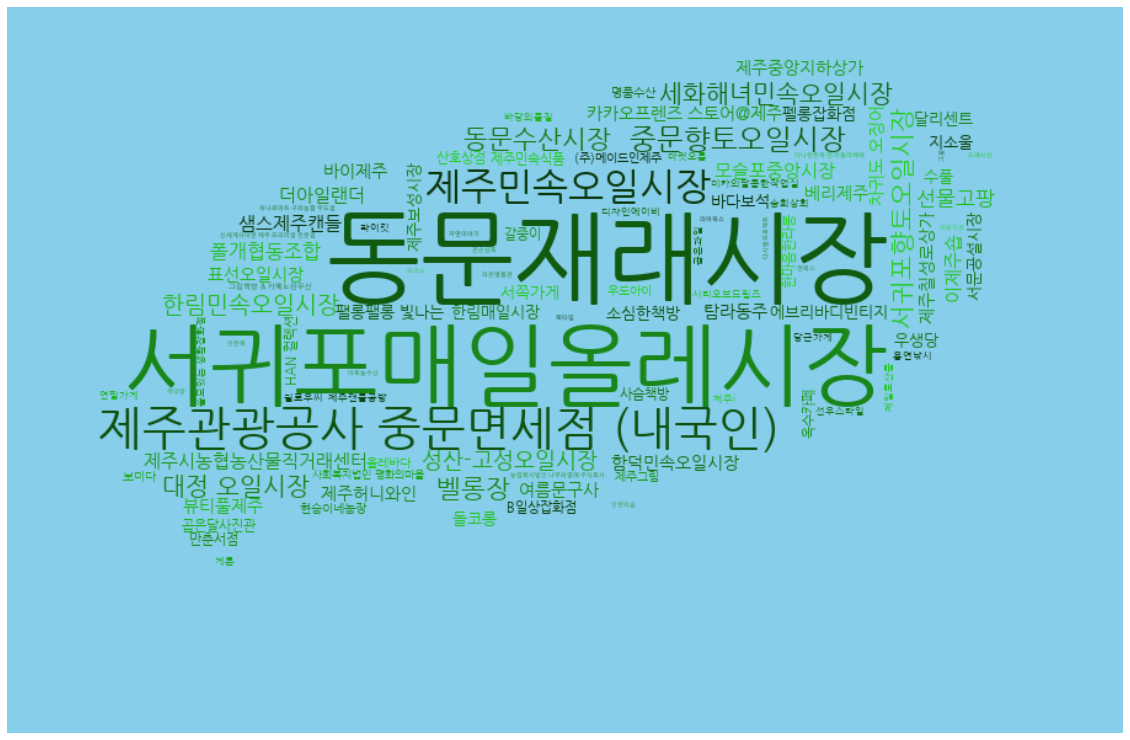

In [ ]:
data = dict(zip(shop['이름'].tolist(), shop['전체'].tolist()))
cloud = wc.generate_from_frequencies(data)
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(cloud.recolor(color_func = grey_color_func),interpolation="bilinear")

## 숙박 검색량 워드클라우드


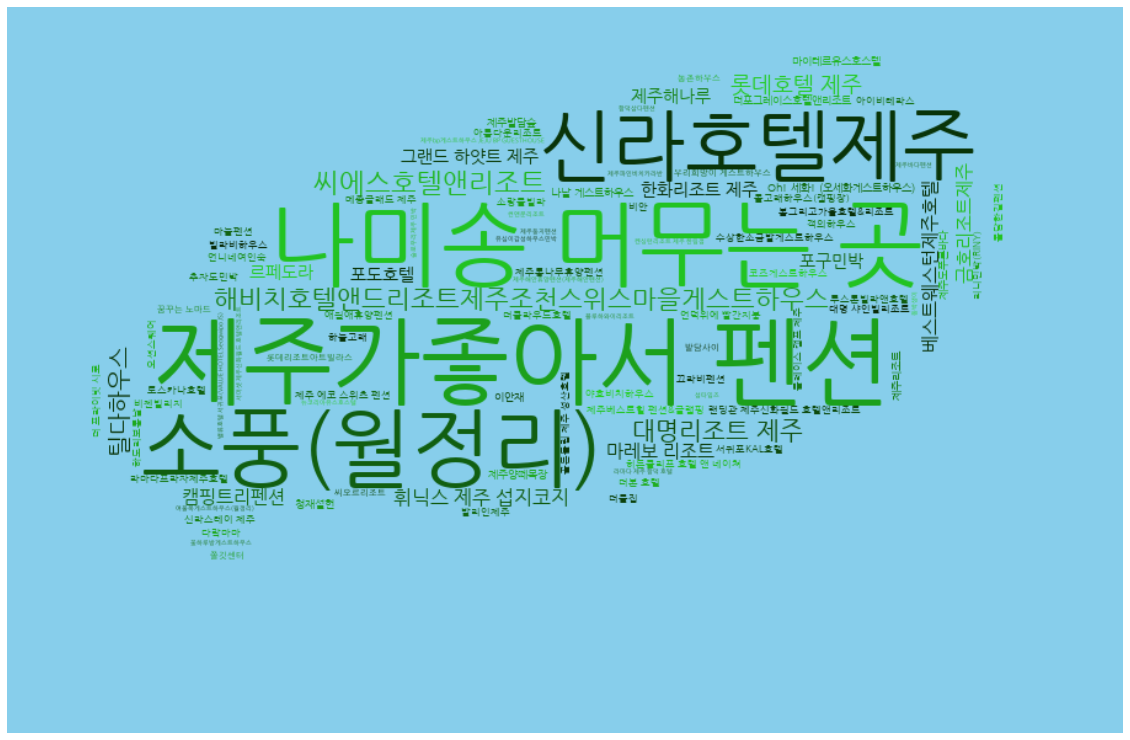

In [ ]:
data = dict(zip(hotel['이름'].tolist(), hotel['전체'].tolist()))
cloud = wc.generate_from_frequencies(data)
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(cloud.recolor(color_func = grey_color_func),interpolation="bilinear")